In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import cosmology
from astropy import constants as const
%matplotlib inline
H0,Om = 68.3, 0.299
cosmo = cosmology.FlatLambdaCDM(H0,Om)


/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:951: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


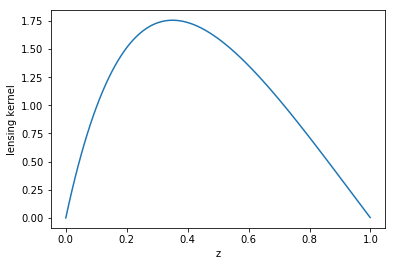

In [2]:
def lensing_kernel(z1,z2):
    factor = const.c**2 / (4*np.pi*const.G)
    sig_crit = factor * cosmo.angular_diameter_distance(z2) / cosmo.angular_diameter_distance(z1) /  cosmo.angular_diameter_distance_z1z2(z1,z2)
    sig_crit_inv = 1./sig_crit.cgs.value
    sig_crit_inv[~np.isfinite(sig_crit_inv)] = 0.
    sig_crit_inv[sig_crit_inv < 0.]= 0.
    return sig_crit_inv

z1 = np.linspace(0,.999,100)
z2 = 1.
plt.plot(z1,lensing_kernel(z1,z2))
plt.xlabel('z')
plt.ylabel('lensing kernel')
plt.show()

In [ ]:
def pz(z,z0 = 0.5,alpha= 2., beta = 2.):
    f = (z/z0)**alpha * np.exp(-(z/z0)**beta)
    return f

def g_kernel(z,ngrid = 1000,zmax = 3.):

    zgrid = np.linspace(0,zmax,ngrid)
    pzgrid = pz(zgrid)
    if len(z) > 1:
        result = np.zeros_like(z)

        for i,thisz in enumerate(z):`
            integrand = lensing_kernel(thisz,zgrid[zgrid>thisz]) * pzgrid[zgrid>thisz]
            result[i] = np.trapz(integrand,x=zgrid[zgrid>thisz])
        return result
    else:
        integrand = lensing_kernel(thisz,zgrid)*pzgrid
        return np.trapz(integrand,x=zgrid)


def g_kernel_blend(zl,ngrid=1000,zmax=3.,R1 = 0.7,R2 = 0.3):
    zgrid = np.linspace(0,zmax,ngrid)    
    if len(zl)>1:
        result = np.zeros_like(zl)
        pz1_integrand = pz(zgrid) 
        pz2_integrand = pz(zgrid)
        for i,zli in enumerate(zl):
            zbgrid1,zbgrid2 = np.meshgrid(zgrid,zgrid)
            sigcrit_inv_1 = lensing_kernel(zli,zbgrid1)
            sigcrit_inv_2 = lensing_kernel(zli,zbgrid2)
            integrand = pz1_integrand * pz2_integrand * (R1 * sigcrit_inv_1 + R2 * sigcrit_inv_2)
            
            first_integral = np.trapz(integrand,x = zbgrid2,axis=0)
            second_integral = np.trapz(first_integral,x=zgrid)
            result[i] = second_integral
        return result
    else:
        zbgrid1,zbgrid2 = np.meshgrid(zgrid,zgrid)
        pz1_integrand = pz(zbgrid1)
        sigcrit_inv_1 = lensing_kernel(zli,zbgrid1)
        pz2_integrand = pz(zbgrid2)
        sigcrit_inv_2 = lensing_kernel(zl,zbgrid2)
        integrand = pz1_integrand * pz2_integrand * (R1 * sigcrit_inv_1 + R2 * sigcrit_inv_2)
        first_integral = np.trapz(integrand,x = zbgrid2,axis=0)
        second_integral = np.trapz(first_integral,x=zgrid)
        return second_integral
    
zz = np.linspace(0,2.5,20)
gg = g_kernel(zz)
gb = g_kernel_blend(zz)
plt.plot(zz,gg)
plt.plot(zz,gb)
plt.plot(zz,pz(zz))
plt.show()


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
